![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [73]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


# Check Nunvalues and Outliners

In [74]:
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<AxesSubplot: >

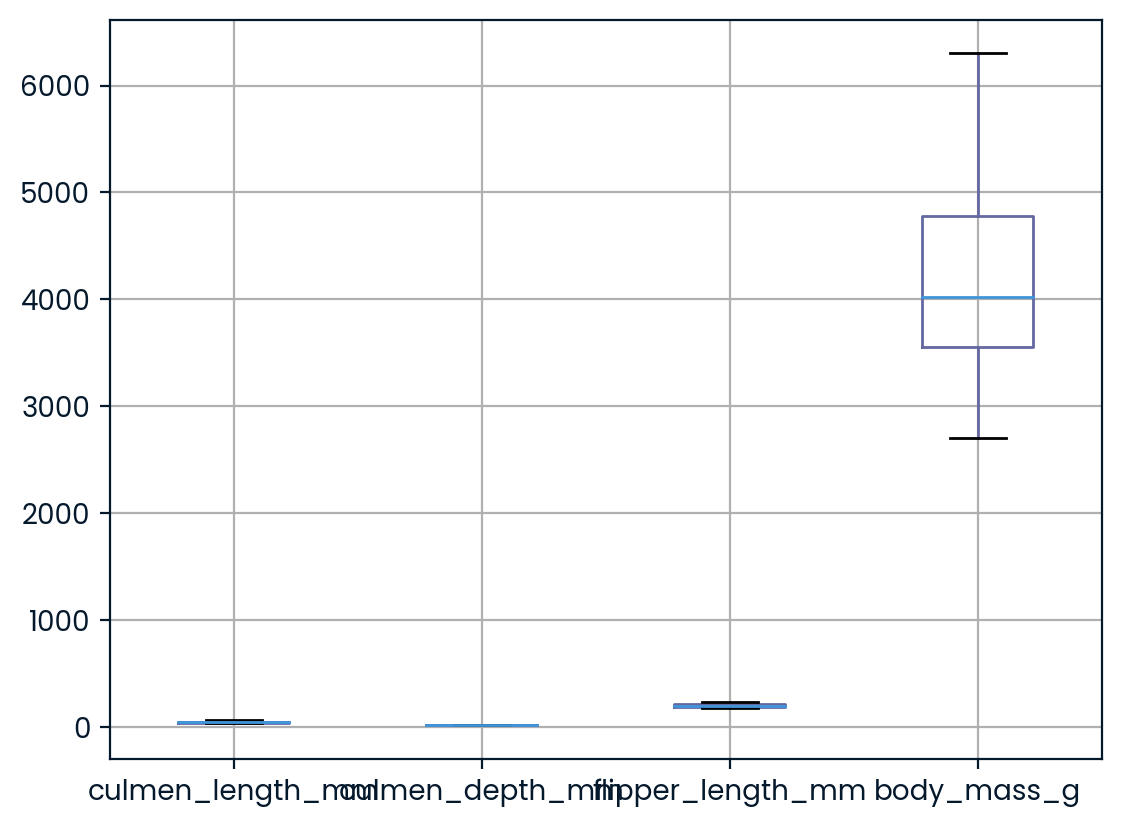

In [75]:
penguins_df.boxplot()

# Do onehotEncoding with the sex column

In [76]:
penguins_df_clean = pd.get_dummies(penguins_df,drop_first=True)
penguins_df_clean

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,0
328,46.8,14.3,215.0,4850.0,0
329,50.4,15.7,222.0,5750.0,1
330,45.2,14.8,212.0,5200.0,0


# Scaling of the Data

In [77]:
scaler = StandardScaler()
penguins_preprocessed = scaler.fit_transform(penguins_df_clean)


# Detect the optimal number of clusters 

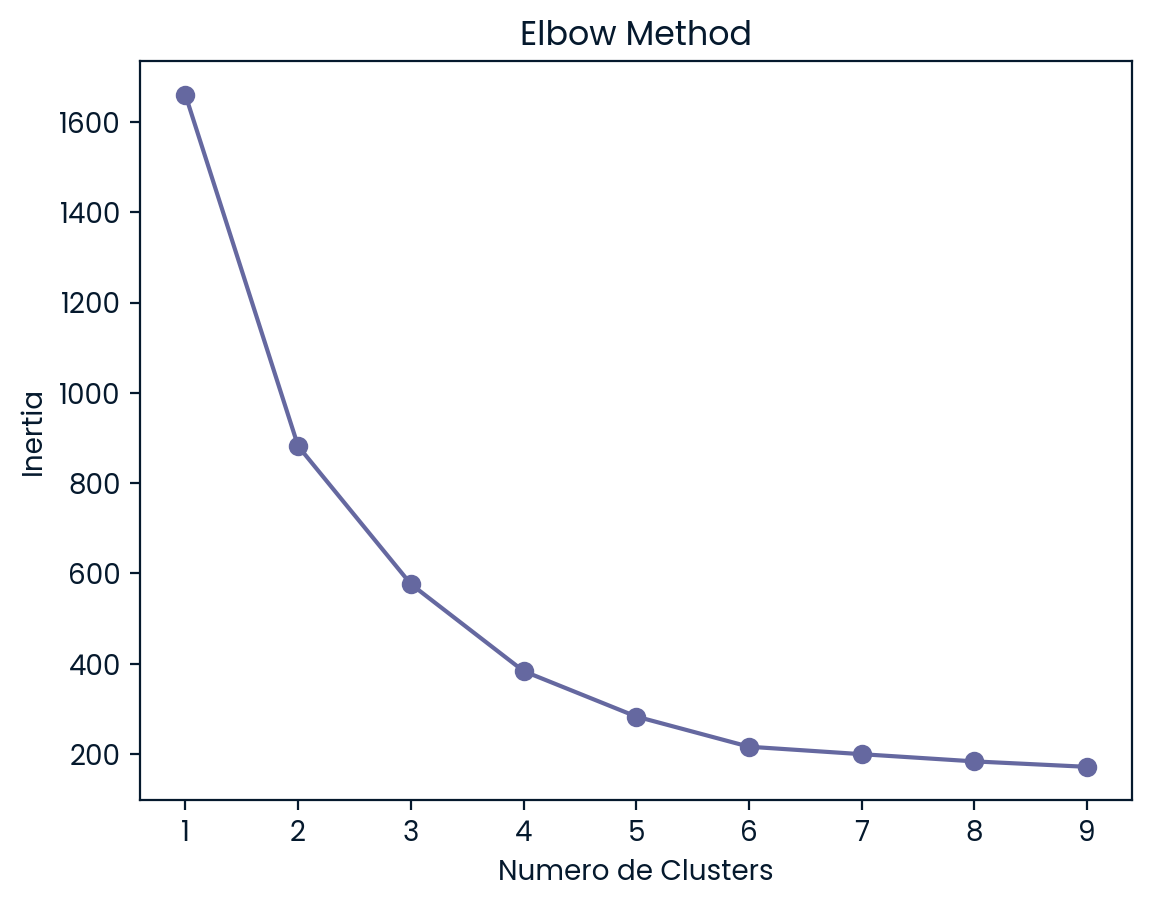

In [78]:
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_preprocessed)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Numero de Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
n_clusters=4

# KMeans and graphication

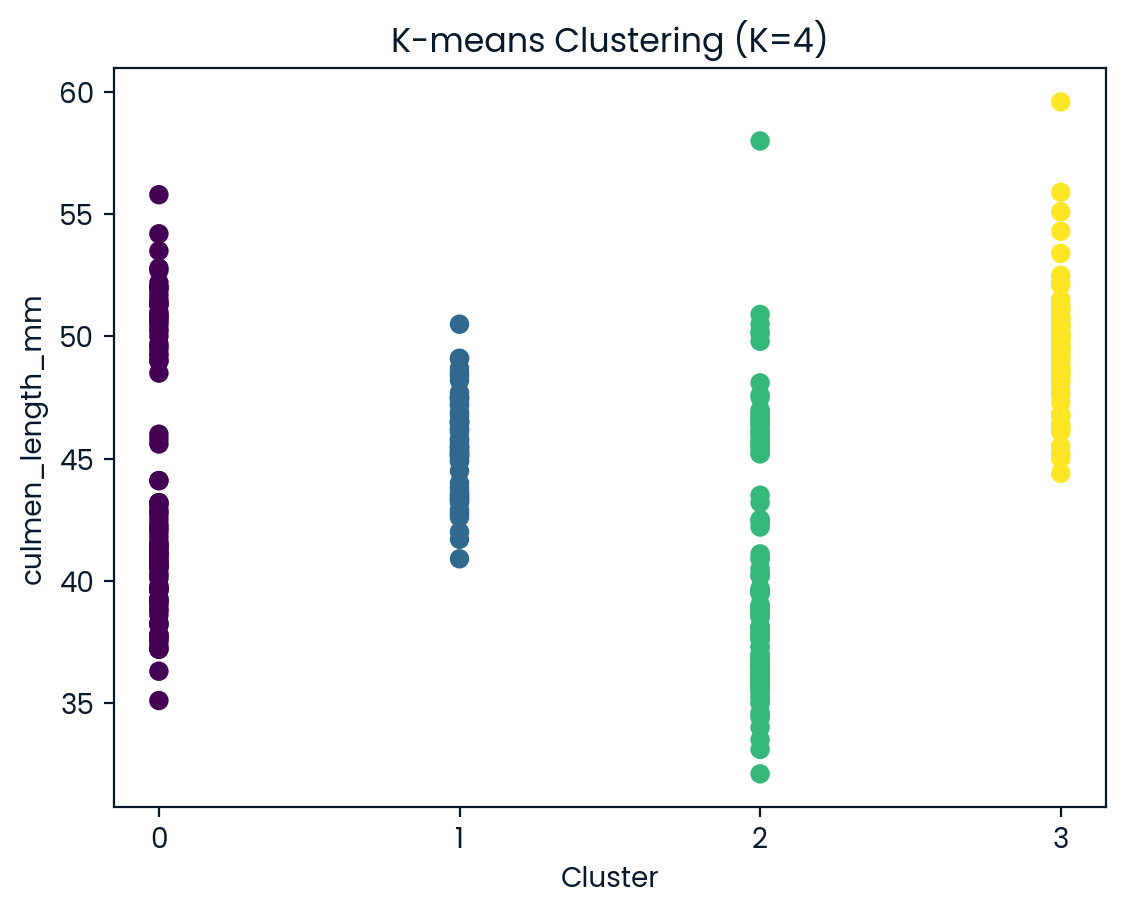

In [79]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_preprocessed)
penguins_df_clean['label'] = kmeans.labels_
plt.scatter(penguins_df_clean['label'], penguins_df_clean['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df_clean['label'].min()), int(penguins_df_clean['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

In [80]:

numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']

stat_penguins = penguins_df_clean.groupby('label')[numeric_columns].mean()

stat_penguins


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,label
label,,,,
0,43.878302,19.111321,194.764151,0.0
1,45.563793,14.237931,212.706897,1.0
2,40.217757,17.611215,189.046729,2.0
3,49.473770,15.718033,221.540984,3.0
